In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# 1. 数据检视

In [165]:
#读取数据集
df = pd.read_csv('train_split.csv',index_col = None)
#查看数据集信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23413 entries, 0 to 23412
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        23413 non-null  object 
 1   Customer_ID               23413 non-null  object 
 2   Month                     23413 non-null  object 
 3   Name                      21019 non-null  object 
 4   Age                       23413 non-null  object 
 5   SSN                       23413 non-null  object 
 6   Occupation                23413 non-null  object 
 7   Annual_Income             23413 non-null  object 
 8   Monthly_Inhand_Salary     19832 non-null  float64
 9   Num_Bank_Accounts         23413 non-null  int64  
 10  Num_Credit_Card           23413 non-null  int64  
 11  Interest_Rate             23413 non-null  int64  
 12  Num_of_Loan               23413 non-null  object 
 13  Type_of_Loan              21019 non-null  object 
 14  Delay_

# 2. 数据清洗

## 2.1 缺失值，异常值 处理

### 1.Age
1. 将带有若干'_'的值去除所有'_'，保留数字
2. 年龄必须大于0且小于100 数据集中出现大量负数和大于100的值当作异常值处理
3. 将数据类型转换为int（由于数据集中存在字符串由pandas读入类型为object）

In [166]:
#Age

#将Age转化为String类型
df['Age'] = df['Age'].astype(str)

#将Age中的带'_'的值去除'_'
df['Age'] = df['Age'].str.replace('_', '')

#将Age变为int类型
df['Age'] = df['Age'].astype(pd.Int64Dtype())

#将Age中小于等于0和超过100的值替换为NaN
df['Age'] = df['Age'].where(df['Age'] <= 100, np.nan)
df['Age'] = df['Age'].where(df['Age'] > 0, np.nan)

df['Age']

0        18
1        31
2        37
3        33
4        18
         ..
23408    38
23409    37
23410    33
23411    32
23412    41
Name: Age, Length: 23413, dtype: Int64

### 2. Occupation
1. "_______"是一个缺失值
    使用正则匹配的方式，替换成NaN

In [167]:
#Occupation

#将Occupation中全为若干个'_'组成的值替换为NaN
df['Occupation'].replace('^_+$', np.nan, regex=True, inplace=True)

df['Occupation']

0              Manager
1             Mechanic
2             Musician
3               Doctor
4           Journalist
             ...      
23408    Media_Manager
23409         Musician
23410          Teacher
23411           Doctor
23412           Lawyer
Name: Occupation, Length: 23413, dtype: object

### 3. Annual_Income
1. 将带有若干'_'的值去除所有'_'，保留数字
2. 将数据类型转换为float（保留两位小数）（由于数据集中存在字符串由pandas读入类型为object）

In [168]:
#Annual_Income

#将Annual_Income转化为String类型
df['Annual_Income'] = df['Annual_Income'].astype(str)

#将Annual_Income中的带'_'的值去除'_'
df['Annual_Income'] = df['Annual_Income'].str.replace('_', '')

#将Annual_Income变为float类型并保留两位小数
df['Annual_Income'] = df['Annual_Income'].astype(float)
df['Annual_Income'] = df['Annual_Income'].round(2)
df['Annual_Income']

0         31633.54
1         33446.44
2         21212.42
3         60938.13
4         73057.16
           ...    
23408     57810.68
23409     15597.31
23410    179948.84
23411      7821.24
23412     20889.65
Name: Annual_Income, Length: 23413, dtype: float64

### 4. Monthly_Inhand_Salary

In [169]:
#Monthly_Inhand_Salary

#将Monthly_Inhand_Salary保留两位小数
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].round(2)

df['Monthly_Inhand_Salary']

0         2930.13
1             NaN
2         1910.70
3         5163.18
4         5998.10
           ...   
23408     4896.56
23409     1456.78
23410    14836.74
23411      468.77
23412     1710.80
Name: Monthly_Inhand_Salary, Length: 23413, dtype: float64

### 5. Num_Bank_Accounts
1. 去除负数（账户数不可能为负数）
2. 怀疑过多的银行账户是异常值，计算超过num的值所占百分比
   在num = 1000时仍有0.52%（大约121个人）
   查找资料发现美国银行数有5000家以上
   综上，认为是合理的，不予处理

In [170]:
# 去除负数
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].where(df['Num_Bank_Accounts'] >= 0, np.nan)

In [171]:
# Num_Bank_Accounts
num = 1000

# 计算 Num_Bank_Accounts中大于 20 的数据的个数
count = df['Num_Bank_Accounts'][df['Num_Bank_Accounts'] > num].count()

# 计算 Num_Bank_Accounts中数据的总个数
total = df['Num_Bank_Accounts'].count()

# 计算百分比
percentage = count / total * 100

# 打印结果
print(f'大于 {num} 的数据占 {percentage:.2f}%')


大于 1000 的数据占 0.52%


In [172]:
# 在数据预览时发现此行的Num_Credit_Card值为-1
x = df.loc[2334]
x
# 通过观察已成功改变

ID                                                    0xc7bd
Customer_ID                                       CUS_0x4f2a
Month                                                 August
Name                                               Margaretf
Age                                                       40
SSN                                              807-03-5415
Occupation                                          Engineer
Annual_Income                                     22136920.0
Monthly_Inhand_Salary                                    NaN
Num_Bank_Accounts                                        NaN
Num_Credit_Card                                            6
Interest_Rate                                              1
Num_of_Loan                                                2
Type_of_Loan                    Auto Loan, and Not Specified
Delay_from_due_date                                       10
Num_of_Delayed_Payment                                     6
Changed_Credit_Limit    

### 6. Num_Credit_Card
1. 去除负数（信用卡数不可能为负数）
2. 怀疑过多的信用卡数是异常值，计算超过num的值所占百分比
   在num = 1000时仍有0.82%（大约191个人）
   查找资料发现美国银行数有5000家以上
   综上，认为是合理的，不予处理

In [173]:
# 去除负数
df['Num_Credit_Card'] = df['Num_Credit_Card'].where(df['Num_Credit_Card'] >= 0, np.nan)

In [174]:
#Num_Credit_Card
num = 1000

# 计算 Num_Bank_Accounts中大于 20 的数据的个数
count = df['Num_Credit_Card'][df['Num_Credit_Card'] > num].count()

# 计算 Num_Bank_Accounts中数据的总个数
total = df['Num_Credit_Card'].count()

# 计算百分比
percentage = count / total * 100

# 打印结果
print(f'大于 {num} 的数据占 {percentage:.2f}%')

大于 1000 的数据占 0.82%


### 7. Interest_Rate
1. 怀疑超过100是异常值,但是经过统计
   人数： 469
   大于 100 的数据占 2.00%
   暂时不予处理

In [175]:
# Interest_Rate

num = 100

# 计算 Interest_Rate中大于 100 的数据的个数
count = df['Interest_Rate'][df['Interest_Rate'] > num].count()

# 计算 Interest_Rate中数据的总个数
total = df['Interest_Rate'].count()
print(f'人数： {count}')
# 计算百分比
percentage = count / total * 100

# 打印结果
print(f'大于 {num} 的数据占 {percentage:.2f}%')


人数： 469
大于 100 的数据占 2.00%


### 8. Num_of_Loan
1. 将带有若干'_'的值去除所有'_'，保留数字
2. 贷款数必须大于等于0 数据集中出现大量负数当作异常值处理，替换成NaN
3. 怀疑大于100的值为异常值，通过与Type_of_Loan对应，发现过大的Num_of_Loan是异常值，替换为NaN
4. 将数据类型转换为int（由于数据集中存在字符串由pandas读入类型为object）

In [176]:
# Num_of_Loan

#将Num_of_Loan转化为String类型
df['Num_of_Loan'] = df['Num_of_Loan'].astype(str)

#将Age中的带'_'的值去除'_'
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_', '')

#将Num_of_Loan变为int类型
df['Num_of_Loan'] = df['Num_of_Loan'].astype(pd.Int64Dtype())

#将Num_of_Loan中小于0值替换为NaN
df['Num_of_Loan'] = df['Num_of_Loan'].where(df['Num_of_Loan'] >= 0, np.nan)

df['Num_of_Loan']



0        3
1        6
2        4
3        8
4        2
        ..
23408    4
23409    5
23410    3
23411    6
23412    5
Name: Num_of_Loan, Length: 23413, dtype: Int64

In [177]:
x = df.loc[487]
x

ID                                                                    0x17866
Customer_ID                                                        CUS_0xab37
Month                                                                     May
Name                                                             Tarmo Virkip
Age                                                                        42
SSN                                                               619-06-3124
Occupation                                                             Lawyer
Annual_Income                                                         70956.8
Monthly_Inhand_Salary                                                 6064.07
Num_Bank_Accounts                                                         6.0
Num_Credit_Card                                                             6
Interest_Rate                                                            2278
Num_of_Loan                                                     

In [178]:
# 查看 Num_of_Loan 大于等于 200 的行
# 筛选条件
condition = df['Num_of_Loan'] >= 200

# 应用筛选条件并获取符合条件的行数据
filtered_data = df[condition]

filtered_data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
68,0x1a924,CUS_0x804d,March,Johni,23,201-52-2520,Architect,21897.50,1986.79,1.0,...,Good,630.68,33.305599,NaN,No,15.487464,33.43919969692089,High_spent_Large_value_payments,389.75254484189935,Good
669,0x3af2,CUS_0x74d5,January,Mortimerz,25,432-94-4099,Lawyer,20821.80,2010.15,5.0,...,Good,1485.97,36.990987,26 Years and 9 Months,NM,21.189697,__10000__,Low_spent_Small_value_payments,242.5757749251817,Poor
854,0x1f164,CUS_0x990,July,Dhanyai,19,655-92-9108,Developer,18937.61,1536.13,8.0,...,_,1306.3,31.886706,15 Years and 4 Months,Yes,80.208365,27.515445030870843,High_spent_Medium_value_payments,295.8896070880838,Poor
1125,0xcb26,CUS_0x6c27,May,Hideyukic,19,297-05-8610,Journalist,56797.38,4784.12,6.0,...,Standard,2279.72,37.030462,16 Years and 3 Months,Yes,141.721835,302.8541038952459,Low_spent_Large_value_payments,303.83556071656346,Poor
1525,0x236b,CUS_0x409e,February,James Pomfretu,23,088-38-3435,Manager,47275.96,4238.66,6.0,...,Good,302.1,34.883541,22 Years and 3 Months,No,121.928877,469.7323729838309,Low_spent_Small_value_payments,122.20508315395494,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21914,0x11f90,CUS_0x47fe,March,Egenterq,21,740-19-9586,NaN,7085.39,668.45,9.0,...,Bad,3988.68,35.074456,13 Years and 3 Months,Yes,25.989110,19.442465214926113,Low_spent_Medium_value_payments,301.4133414733218,Poor
22992,0x7f36,CUS_0x3475,May,NaN,27,271-20-5461,NaN,36783.38,3151.28,10.0,...,Bad,4555.72,27.449575,1 Years and 9 Months,Yes,33421.000000,124.78002159848414,Low_spent_Small_value_payments,331.99002729881545,Poor
23048,0x6cfd,CUS_0x1410,August,NaN,43,087-58-6247,Teacher,96882.93,8229.58,5.0,...,Good,355.41,27.312835,NaN,NM,73.173723,180.20040454139752,High_spent_Large_value_payments,809.5836221743716,Poor
23232,0x183ec,CUS_0x317e,March,Jennifery,18,527-06-4214,Mechanic,62008.35,5256.36,10.0,...,Standard,2360.12,38.523179,NaN,Yes,127.392147,179.39112720340634,High_spent_Medium_value_payments,468.8529757445841,Poor


In [179]:
# 查看 Num_of_Loan 的中位数和众数
# 获取列的众数
mode = df['Num_of_Loan'].mode()
print("Mode:")
print(mode)

# 获取列的中位数
median = df['Num_of_Loan'].median()
print("Median:")
print(median)


Mode:
0    2
Name: Num_of_Loan, dtype: Int64
Median:
4.0


### 9. Type_of_Loan


In [180]:
# Type_of_Loan

### 10. Delay_from_due_date
1.  从付款日期延迟的平均天数必须大于等于0 数据集中出现大量负数当作异常值处理，替换成NaN

In [181]:
# Delay_from_due_date

# 将Delay_from_due_date中小于0值替换为NaN
df['Delay_from_due_date'] = df['Delay_from_due_date'].where(df['Delay_from_due_date'] >= 0, np.nan)

### 11. Num_of_Delayed_Payment
1. 延迟付款次数必须大于等于0 数据集中出现大量负数当作异常值处理，替换成NaN
2. 将带有若干'_'的值去除所有'_'，保留数字

In [182]:
# Num_of_Delayed_Payment

# 将 NaN 替换为 -1
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(-1)

# 将Num_of_Delayed_Payment转化为String类型
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(str)

# Num_of_Delayed_Payment中的带'_'的值去除'_'
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_', '')

# 将列的数据类型更改为整数
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(int)

# 将Num_of_Delayed_Payment中小于0值替换为NaN
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].where(df['Num_of_Delayed_Payment'] >= 0, np.nan)

### 12. Changed_Credit_Limit
1. 将为'_'的值替换为NaN
2. 检查数据发现所有数据绝对值都在100以内，不予处理
3. 将数据类型转换为float（由于数据集中存在字符串由pandas读入类型为object）

In [183]:
# Changed_Credit_Limit
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_',np.nan)

df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)

### 13. Num_Credit_Inquiries

In [184]:
# Num_Credit_Inquiries

### 14. Credit_Mix
1. 将为'_'的值替换为NaN

In [185]:
# Credit_Mix

df['Credit_Mix'] = df['Credit_Mix'].replace('_',np.nan)



### 15. Outstanding_Debt
1. 将带有若干'_'的值去除所有'_'，保留数字
2. 将数据类型转换为float（由于数据集中存在字符串由pandas读入类型为object）

In [186]:
# Outstanding_Debt

# 将Outstanding_Debt转化为String类型
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(str)

# Outstanding_Debt中的带'_'的值去除'_'
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '')

# 将列的数据类型更改为整数
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)

### 16. Credit_Utilization_Ratio

In [187]:
# Credit_Utilization_Ratio

### 17. Credit_History_Age

In [188]:
# Credit_History_Age

### 18. Payment_of_Min_Amount

In [189]:
# Payment_of_Min_Amount

### 19. Total_EMI_per_month

In [190]:
# Total_EMI_per_month

### 20. Amount_invested_monthly
1. 将'_10000_'替换为'10000'
2. 将数据类型转换为float（由于数据集中存在字符串由pandas读入类型为object）

In [191]:
# Amount_invested_monthly

df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace('__10000__','10000')

df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)

### 21. Payment_Behaviour
1. 将'!@9#%8'转换为NaN

In [192]:
# Payment_Behaviour

df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8',np.nan)

### 22. Monthly_Balance
1. 将'__-333333333333333333333333333__'转换为NaN
2. 将数据类型转换为float（由于数据集中存在字符串由pandas读入类型为object）

In [193]:
# Monthly_Balance

df['Monthly_Balance'] = df['Monthly_Balance'].replace('__-333333333333333333333333333__',np.nan)

df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)

### 23. Credit_Score

In [194]:
# Credit_Score

In [195]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis = 1,keys = ['Total','Percent'])
missing_data

,Total,Percent
Credit_Mix,4779,0.204117
Monthly_Inhand_Salary,3581,0.152949
Name,2394,0.102251
Type_of_Loan,2394,0.102251
Credit_History_Age,2143,0.091530
Num_of_Delayed_Payment,1829,0.078119
Payment_Behaviour,1764,0.075343
Occupation,1638,0.069961
Amount_invested_monthly,1109,0.047367
Num_of_Loan,965,0.041216


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23413 entries, 0 to 23412
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        23413 non-null  object 
 1   Customer_ID               23413 non-null  object 
 2   Month                     23413 non-null  object 
 3   Name                      21019 non-null  object 
 4   Age                       22741 non-null  Int64  
 5   SSN                       23413 non-null  object 
 6   Occupation                21775 non-null  object 
 7   Annual_Income             23413 non-null  float64
 8   Monthly_Inhand_Salary     19832 non-null  float64
 9   Num_Bank_Accounts         23404 non-null  float64
 10  Num_Credit_Card           23413 non-null  int64  
 11  Interest_Rate             23413 non-null  int64  
 12  Num_of_Loan               22448 non-null  Int64  
 13  Type_of_Loan              21019 non-null  object 
 14  Delay_

In [197]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x2184,CUS_0xab00,July,Markx,18,468-20-7719,Manager,31633.54,2930.13,1.0,...,Good,846.45,37.934665,22 Years and 2 Months,No,50.768440,275.759795,Low_spent_Medium_value_payments,246.484598,Poor
1,0x196a2,CUS_0x5fe0,May,Erwin Sebae,31,032-10-6627,Mechanic,33446.44,NaN,6.0,...,NaN,2953.68,37.895848,9 Years and 7 Months,Yes,133.355905,93.650442,Low_spent_Large_value_payments,348.813987,Poor
2,0x1e96c,CUS_0xc301,July,NaN,37,169-93-9953,Musician,21212.42,1910.70,1.0,...,NaN,479.83,36.491037,23 Years and 1 Months,No,50.305036,172.477693,Low_spent_Large_value_payments,238.287438,Good
3,0x1b8a,CUS_0x1288,January,Taylorq,33,609-85-2725,Doctor,60938.13,5163.18,10.0,...,Bad,3947.24,21.744884,4 Years and 10 Months,Yes,378.304673,166.487676,High_spent_Small_value_payments,231.525401,Poor
4,0x24b9d,CUS_0x899,April,Klaymanm,18,797-96-0406,Journalist,73057.16,5998.10,4.0,...,Standard,2569.09,27.350833,9 Years and 6 Months,Yes,91.354188,66.232154,High_spent_Medium_value_payments,692.223325,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23408,0x18db8,CUS_0x269d,March,Lukef,38,415-10-2620,Media_Manager,57810.68,4896.56,7.0,...,Good,1419.99,27.141606,30 Years and 4 Months,No,131.871482,416.933866,Low_spent_Small_value_payments,230.850318,Good
23409,0x1304e,CUS_0x8e50,May,Sinead Carewp,37,052-30-0753,Musician,15597.31,1456.78,8.0,...,Standard,741.46,32.418000,5 Years and 6 Months,Yes,45.804440,142.100773,Low_spent_Medium_value_payments,237.772370,Good
23410,0x48f0,CUS_0x62e9,July,Woodallf,33,678-34-4743,Teacher,179948.84,14836.74,0.0,...,Good,1104.31,31.508604,31 Years and 8 Months,No,446.259347,10000.000000,Low_spent_Large_value_payments,309.497362,Poor
23411,0x1ff8,CUS_0x3ef5,July,NaN,32,259-09-9023,Doctor,7821.24,468.77,8.0,...,Bad,2924.76,33.575214,10 Years and 3 Months,Yes,19.727923,20.269324,Low_spent_Medium_value_payments,286.879752,Poor


## 2.2 缺失值，异常值填充

### 2.2.1 数值属性处理

绘制数值属性的直方图以及核密度曲线

In [198]:
def plot_histogram_without_nan(column_name, data_frame):
    plt.figure(figsize=(8, 6))
    sns.histplot(data_frame[column_name].dropna(), kde=True)
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.title(f'Histogram of {column_name}')
    plt.show()

In [199]:
def print_messages(df,col):
    # 计算 col 列的缺失值个数
    missing = df[col].isnull().sum()
    print(f'缺失值数量 {missing}')

    # 计算 col 列的缺失值所占的比例
    percentage = missing / len(df) * 100
    print(f'缺失值所占比例为 {percentage:.2f}%')

    # 计算 col 列的统计信息，包括计数、均值、标准差、最小值、四分位数、最大值等
    stats = df[col].describe()
    print(stats)

    # 计算 col 列的众数，也就是出现次数最多的值
    mode = df[col].mode()
    print(mode)

In [200]:
# # 筛选出 int 和 float 类型的列
# numeric_cols = df.select_dtypes(include=['int', 'float']).columns
#
# # 循环调用绘制密度曲线的函数
# for col in numeric_cols:
#     plot_histogram_without_nan(col, df)

#### 1. Age

缺失值数量 672
缺失值所占比例为 2.87%
count    22741.000000
mean        33.173475
std         10.735782
min         14.000000
25%         24.000000
50%         33.000000
75%         41.000000
max         99.000000
Name: Age, dtype: float64
0    28
Name: Age, dtype: Int64


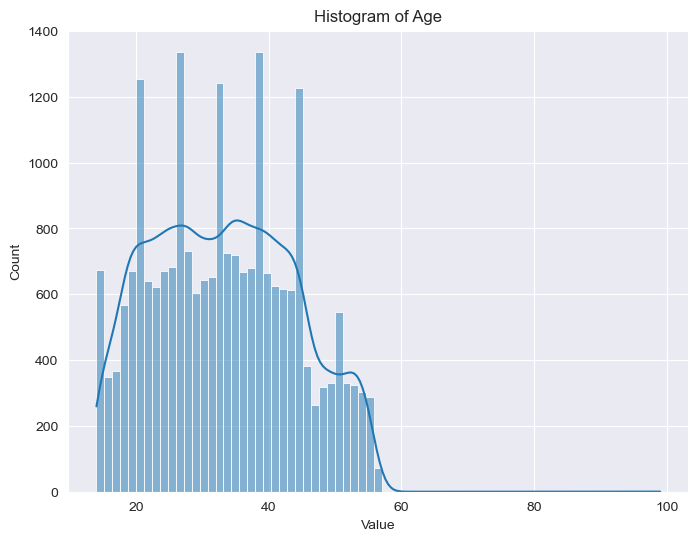

In [201]:
# 打印统计信息
print_messages(df,'Age')
plot_histogram_without_nan("Age", df)

In [202]:
df['Age'] = df['Age'].fillna(df['Age'].median()) # 用中位数填充缺失值

#### 2. Annual Income

In [203]:
# 打印统计信息
print_messages(df,'Annual_Income')

缺失值数量 0
缺失值所占比例为 0.00%
count    2.341300e+04
mean     1.679657e+05
std      1.408502e+06
min      7.005930e+03
25%      1.877166e+04
50%      3.761254e+04
75%      7.095680e+04
max      2.391294e+07
Name: Annual_Income, dtype: float64
0     33832.58
1     40332.61
2     46855.17
3     54881.55
4    167753.52
Name: Annual_Income, dtype: float64


#### 3. Monthly_Inhand_Salary

缺失值数量 3581
缺失值所占比例为 15.29%
count    19832.000000
mean      4141.187072
std       3252.627057
min        319.560000
25%       1564.690000
50%       3080.560000
75%       5801.970000
max      15204.630000
Name: Monthly_Inhand_Salary, dtype: float64
0    1843.08
Name: Monthly_Inhand_Salary, dtype: float64


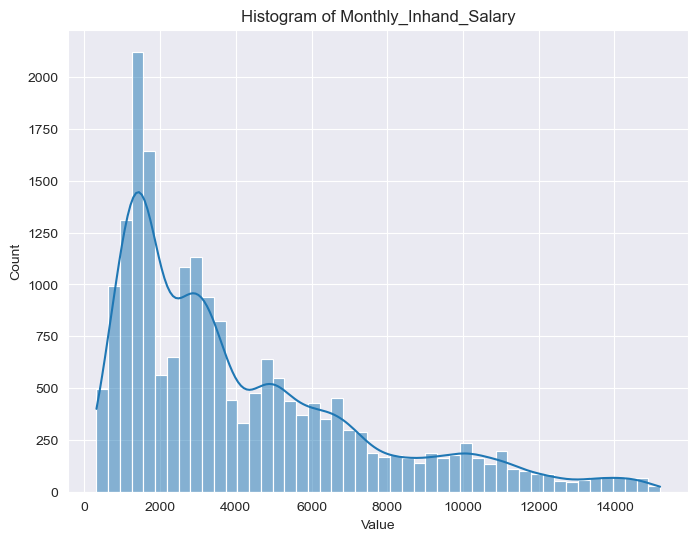

In [204]:
# 打印统计信息
print_messages(df,'Monthly_Inhand_Salary')
plot_histogram_without_nan("Monthly_Inhand_Salary", df)

In [205]:
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median()) # 用中位数填充缺失值

#### 4. Num_Bank_Accounts
根据直方图和核密度曲线， 使用中位数填充NaN

缺失值数量 9
缺失值所占比例为 0.04%
count    23404.000000
mean        16.767177
std        114.277357
min          0.000000
25%          3.000000
50%          6.000000
75%          8.000000
max       1794.000000
Name: Num_Bank_Accounts, dtype: float64
0    7.0
Name: Num_Bank_Accounts, dtype: float64


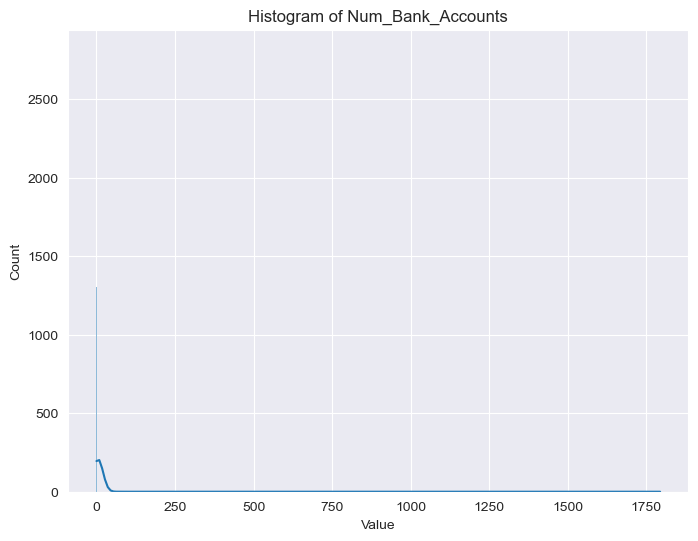

In [206]:
# 打印统计信息
print_messages(df,'Num_Bank_Accounts')
plot_histogram_without_nan("Num_Bank_Accounts", df)

In [207]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].fillna(df['Num_Bank_Accounts'].median()) # 用中位数填充缺失值

#### 5. Num_Credit_Card

In [208]:
print_messages(df,'Num_Credit_Card')

缺失值数量 0
缺失值所占比例为 0.00%
count    23413.000000
mean        22.776492
std        131.197844
min          0.000000
25%          4.000000
50%          6.000000
75%          7.000000
max       1498.000000
Name: Num_Credit_Card, dtype: float64
0    5
Name: Num_Credit_Card, dtype: int64


#### 6. Interest_Rate


In [209]:
print_messages(df,'Interest_Rate')

缺失值数量 0
缺失值所占比例为 0.00%
count    23413.000000
mean        72.264298
std        460.147341
min          1.000000
25%          7.000000
50%         15.000000
75%         24.000000
max       5788.000000
Name: Interest_Rate, dtype: float64
0    8
Name: Interest_Rate, dtype: int64


#### 8. Num_of_Loan
根据直方图和核密度曲线， 使用中位数填充NaN

缺失值数量 965
缺失值所占比例为 4.12%
count    22448.000000
mean         7.431932
std         59.923773
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max       1480.000000
Name: Num_of_Loan, dtype: float64
0    2
Name: Num_of_Loan, dtype: Int64


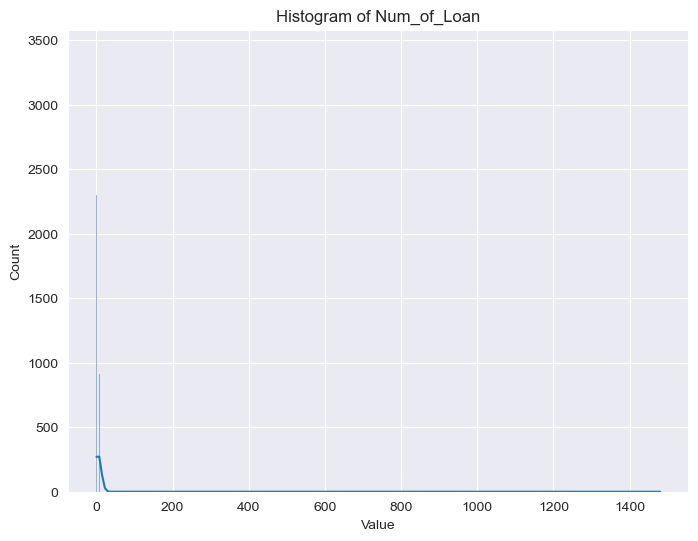

In [210]:
# 打印统计信息
print_messages(df,'Num_of_Loan')
plot_histogram_without_nan("Num_of_Loan", df)

In [211]:
df['Num_of_Loan'] = df['Num_of_Loan'].fillna(df['Num_of_Loan'].median()) # 用中位数填充缺失值

#### 9. Delay_from_due_date
根据直方图和核密度曲线， 使用均值填充NaN

缺失值数量 201
缺失值所占比例为 0.86%
count    23212.000000
mean        22.748664
std         16.452230
min          0.000000
25%         10.000000
50%         19.000000
75%         31.000000
max         67.000000
Name: Delay_from_due_date, dtype: float64
0    15.0
Name: Delay_from_due_date, dtype: float64


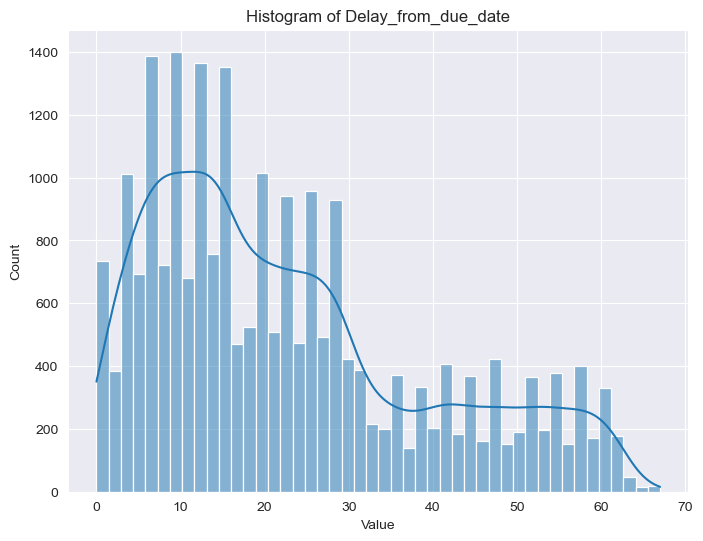

In [212]:
# 打印统计信息
print_messages(df,'Delay_from_due_date')
plot_histogram_without_nan("Delay_from_due_date", df)
df['Delay_from_due_date'] = df['Delay_from_due_date'].fillna(df['Delay_from_due_date'].mean()) # 用均值填充缺失值

#### 10. Num_of_Delayed_Payment
根据直方图和核密度曲线， 使用中位数填充NaN

缺失值数量 1829
缺失值所占比例为 7.81%
count    21584.000000
mean        30.301937
std        223.628420
min          0.000000
25%          8.000000
50%         14.000000
75%         19.000000
max       4340.000000
Name: Num_of_Delayed_Payment, dtype: float64
0    10.0
Name: Num_of_Delayed_Payment, dtype: float64


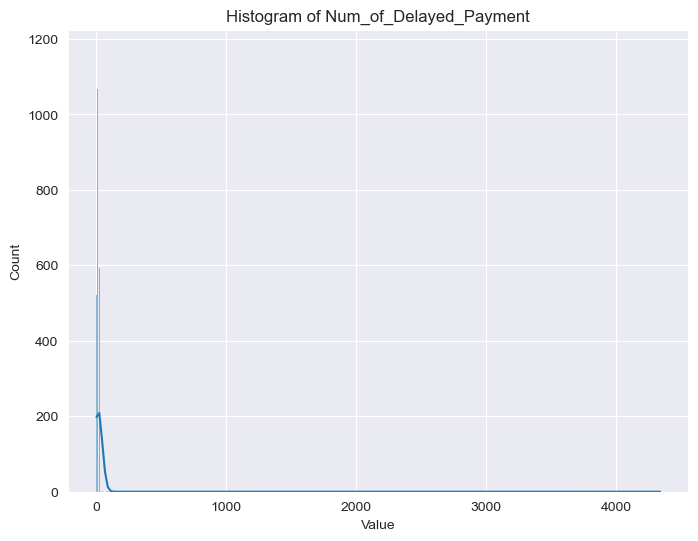

In [213]:
# 打印统计信息
print_messages(df,'Num_of_Delayed_Payment')
plot_histogram_without_nan("Num_of_Delayed_Payment", df)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].median()) # 用中位数填充缺失值

#### 11. Changed_Credit_Limit
根据直方图和核密度曲线， 使用均值填充NaN

缺失值数量 512
缺失值所占比例为 2.19%
count    22901.000000
mean         9.613264
std          6.711423
min         -6.490000
25%          4.600000
50%          8.590000
75%         13.170000
max         35.300000
Name: Changed_Credit_Limit, dtype: float64
0    9.25
Name: Changed_Credit_Limit, dtype: float64


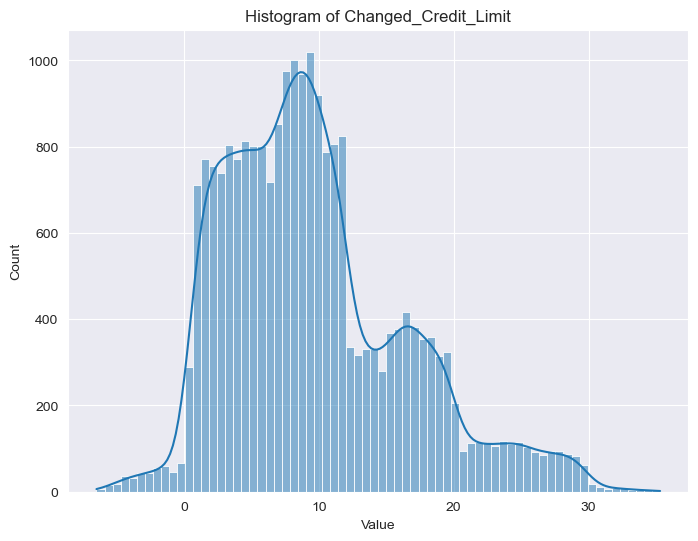

In [214]:
# 打印统计信息
print_messages(df,'Changed_Credit_Limit')
plot_histogram_without_nan("Changed_Credit_Limit", df)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(df['Changed_Credit_Limit'].mean()) # 用均值填充缺失值

#### 12. Num_Credit_Inquiries
根据直方图和核密度曲线， 使用中位数填充NaN

缺失值数量 438
缺失值所占比例为 1.87%
count    22975.000000
mean        27.925223
std        191.189327
min          0.000000
25%          3.000000
50%          6.000000
75%         10.000000
max       2587.000000
Name: Num_Credit_Inquiries, dtype: float64
0    4.0
Name: Num_Credit_Inquiries, dtype: float64


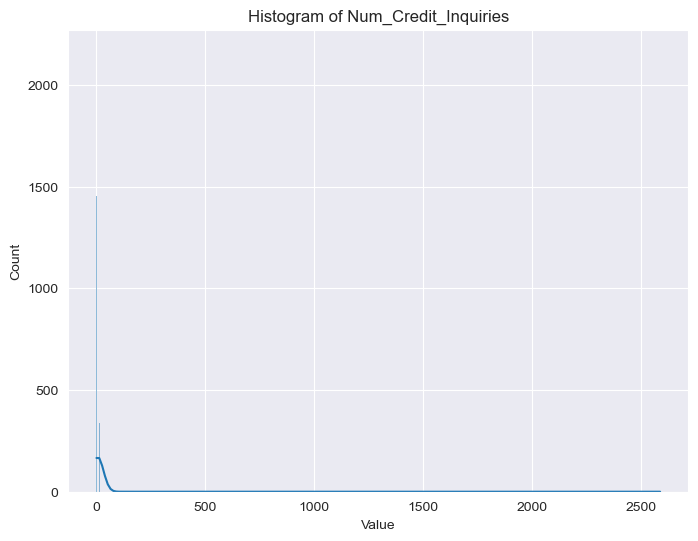

In [215]:
# 打印统计信息
print_messages(df,'Num_Credit_Inquiries')
plot_histogram_without_nan("Num_Credit_Inquiries", df)
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].median()) # 用中位数填充缺失值

#### 13. Amount_invested_monthly
根据直方图和核密度曲线， 使用中位数填充NaN

缺失值数量 1109
缺失值所占比例为 4.74%
count    22304.000000
mean       647.722515
std       2065.548914
min          0.000000
25%         73.726750
50%        134.355560
75%        264.106623
max      10000.000000
Name: Amount_invested_monthly, dtype: float64
0    10000.0
Name: Amount_invested_monthly, dtype: float64


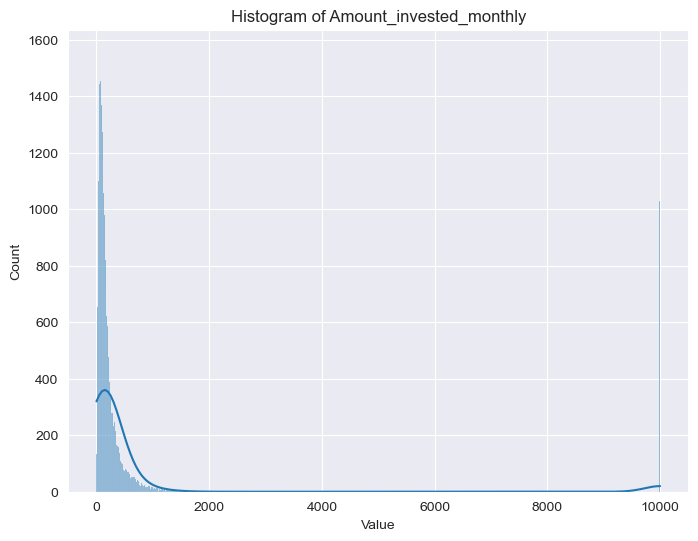

In [216]:
# 打印统计信息
print_messages(df,'Amount_invested_monthly')
plot_histogram_without_nan("Amount_invested_monthly", df)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].median()) # 用中位数填充缺失值

#### 14. Monthly_Balance
根据直方图和核密度曲线， 使用均值填充NaN

缺失值数量 289
缺失值所占比例为 1.23%
count    23124.000000
mean       395.057165
std        215.770507
min          0.095482
25%        266.143676
50%        328.424374
75%        454.959602
max       1602.040519
Name: Monthly_Balance, dtype: float64
0           0.095482
1           0.366147
2           0.419124
3           0.453456
4           0.503582
            ...     
23119    1528.744936
23120    1555.201051
23121    1558.421841
23122    1566.613165
23123    1602.040519
Name: Monthly_Balance, Length: 23124, dtype: float64


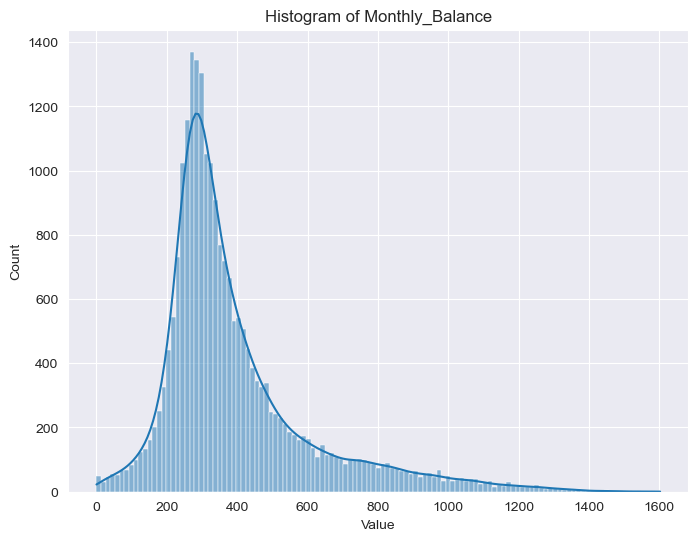

In [217]:
# 打印统计信息
print_messages(df,'Monthly_Balance')
plot_histogram_without_nan("Monthly_Balance", df)
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(df['Monthly_Balance'].mean()) # 用均值填充缺失值

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23413 entries, 0 to 23412
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        23413 non-null  object 
 1   Customer_ID               23413 non-null  object 
 2   Month                     23413 non-null  object 
 3   Name                      21019 non-null  object 
 4   Age                       23413 non-null  Int64  
 5   SSN                       23413 non-null  object 
 6   Occupation                21775 non-null  object 
 7   Annual_Income             23413 non-null  float64
 8   Monthly_Inhand_Salary     23413 non-null  float64
 9   Num_Bank_Accounts         23413 non-null  float64
 10  Num_Credit_Card           23413 non-null  int64  
 11  Interest_Rate             23413 non-null  int64  
 12  Num_of_Loan               23413 non-null  Int64  
 13  Type_of_Loan              21019 non-null  object 
 14  Delay_

### 2.2 非数值属性处理


In [219]:
def count_and_fill_missing_values(dataframe, attribute_name, fill_value):
    # 统计缺失值数量
    missing_count = dataframe[attribute_name].isnull().sum()

    # 计算缺失值所占比例
    total_count = len(dataframe)
    missing_percentage = (missing_count / total_count) * 100

    # 填充缺失值
    dataframe[attribute_name].fillna(fill_value, inplace=True)

    print(f"缺失值有 {missing_count}, 所占比例 {missing_percentage:.2f}%")

    missing_count = dataframe[attribute_name].isnull().sum()
    print(f'填充后有 {missing_count} 个缺失值')

In [220]:
# 绘图函数
def plot_attribute_distribution(dataframe, attribute_name):
    # 统计每个属性的计数
    attribute_counts = pd.value_counts(dataframe[attribute_name])

    # 绘制柱状图
    plt.figure(figsize=(10, 6))
    attribute_counts.plot(kind='bar')
    plt.xlabel(attribute_name)
    plt.ylabel('Count')
    plt.title(f'Distribution of {attribute_name}')
    plt.show()

#### 1. Occupation

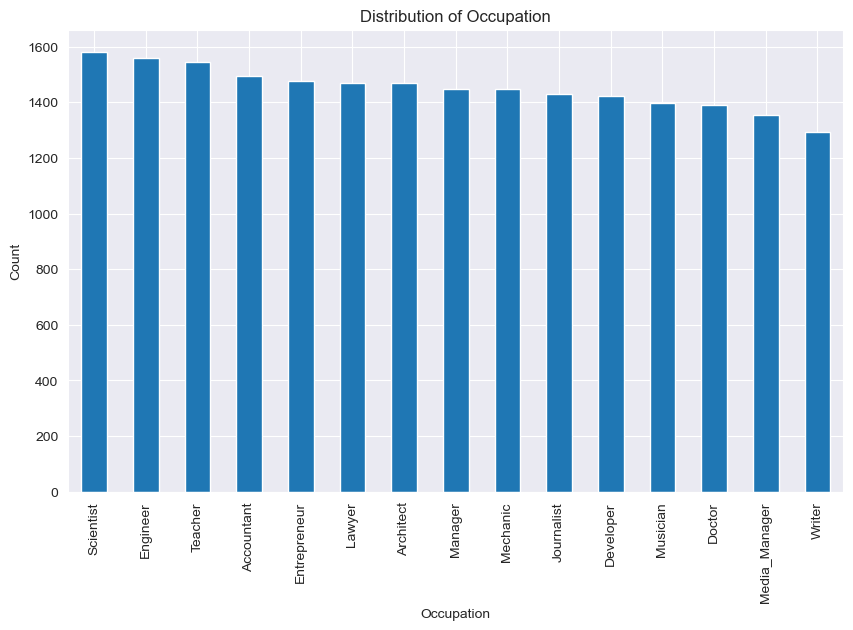

In [221]:
plot_attribute_distribution(df, "Occupation")

In [222]:
# 使用众数填充 NaN
count_and_fill_missing_values(df, "Occupation", "Scientist")

缺失值有 1638, 所占比例 7.00%
填充后有 0 个缺失值


#### 2. Type_of_Loan

In [223]:
# 统计缺失值数量
missing_count = df["Type_of_Loan"].isnull().sum()

# 计算缺失值所占比例
total_count = len(df)
missing_percentage = (missing_count / total_count) * 100

print(f"缺失值有 {missing_count}, 所占比例 {missing_percentage:.2f}%")

缺失值有 2394, 所占比例 10.23%


发现Num_of_Loan是0的时候，Type_of_Loan也是NaN，占了绝大多数NaN
所以使用 0 填充NaN

In [224]:
# 使用0填充NaN
df["Type_of_Loan"].fillna(0, inplace=True)

#### 3. Credit_Mix

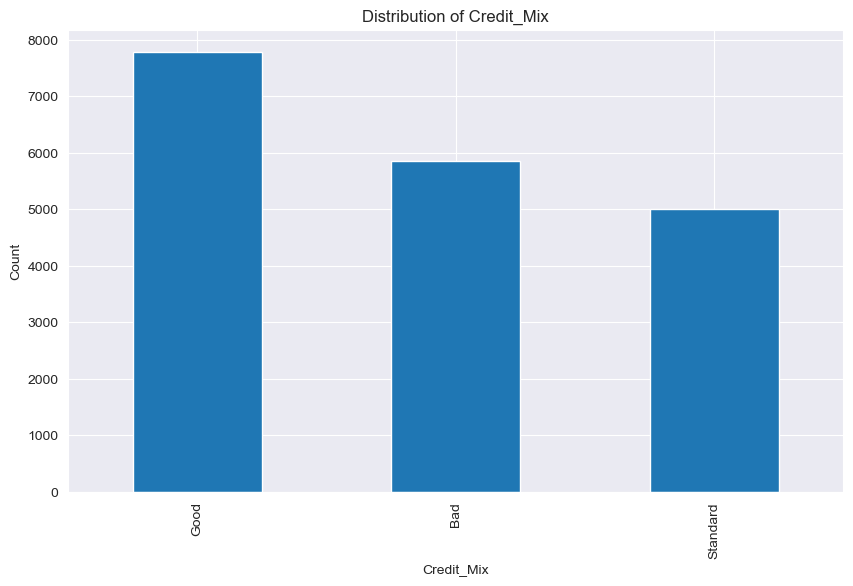

In [225]:
plot_attribute_distribution(df, "Credit_Mix")

In [226]:
count_and_fill_missing_values(df, "Credit_Mix", "Good")

缺失值有 4779, 所占比例 20.41%
填充后有 0 个缺失值


#### 4. Credit_History_Age
1. 将Credit_History_Age转换成月数（float类型）
2. 根据直方图和核密度曲线， 使用均值填充NaN

In [227]:
import re

# 将Credit_History_Age转换成月数（float类型）
pattern = r"(\d+) Years and (\d+) Months"
# 不删除含有NaN值的行，但也不对它们应用正则表达式
df['Credit_History_Age'] = df['Credit_History_Age'].str.extract(pattern).apply(lambda x: int(x[0]) * 12 + int(x[1]) if pd.notnull(x[0]) and pd.notnull(x[1]) else x[0], axis=1)


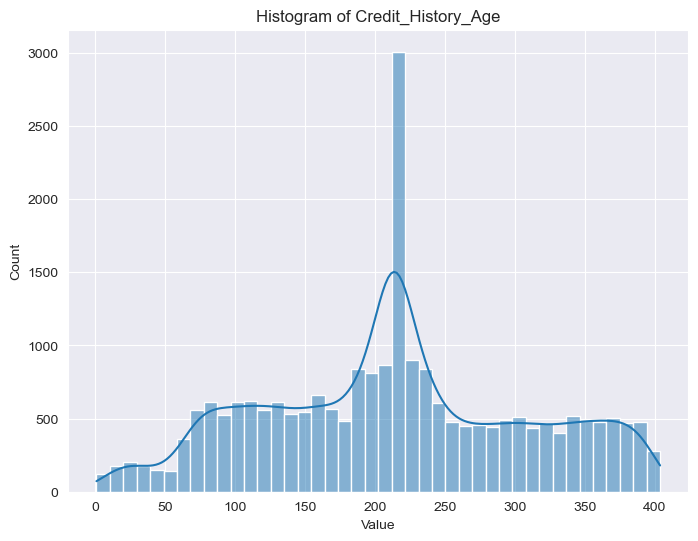

缺失值数量 0
缺失值所占比例为 0.00%
count    23413.000000
mean       213.490926
std         94.831951
min          1.000000
25%        143.000000
50%        213.490926
75%        281.000000
max        404.000000
Name: Credit_History_Age, dtype: float64
0    213.490926
Name: Credit_History_Age, dtype: float64


In [228]:
df['Credit_History_Age'] = df['Credit_History_Age'].fillna(df['Credit_History_Age'].mean()) # 用均值填充缺失值
plot_histogram_without_nan("Credit_History_Age", df)
print_messages(df,'Credit_History_Age')

#### 5. Payment_Behaviour

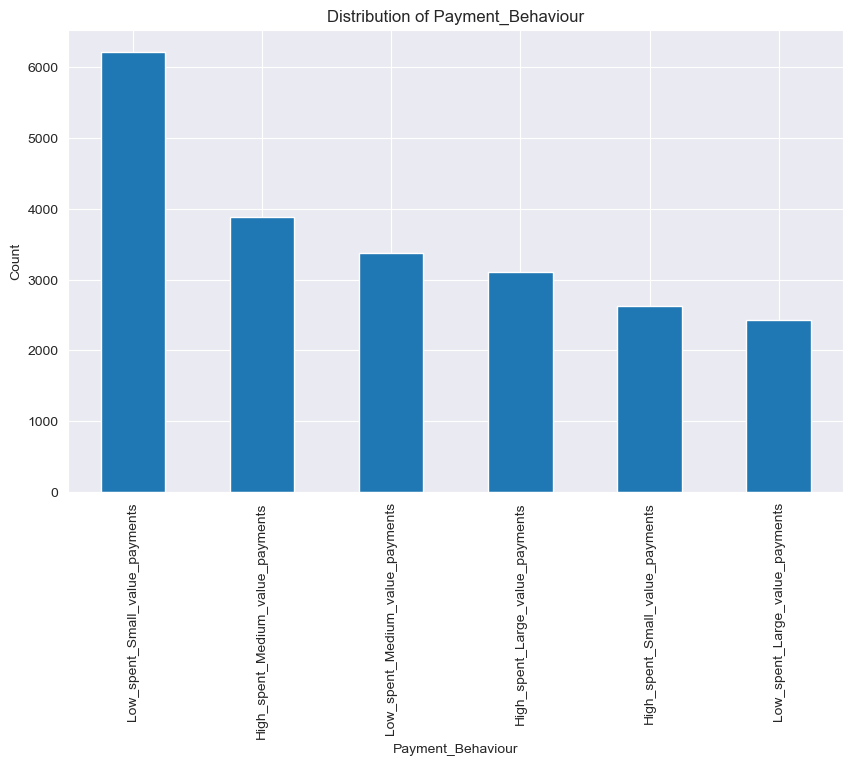

In [229]:
plot_attribute_distribution(df, "Payment_Behaviour")

In [230]:
count_and_fill_missing_values(df, "Payment_Behaviour", "Low_spent_Small_value_payments")

缺失值有 1764, 所占比例 7.53%
填充后有 0 个缺失值


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23413 entries, 0 to 23412
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        23413 non-null  object 
 1   Customer_ID               23413 non-null  object 
 2   Month                     23413 non-null  object 
 3   Name                      21019 non-null  object 
 4   Age                       23413 non-null  Int64  
 5   SSN                       23413 non-null  object 
 6   Occupation                23413 non-null  object 
 7   Annual_Income             23413 non-null  float64
 8   Monthly_Inhand_Salary     23413 non-null  float64
 9   Num_Bank_Accounts         23413 non-null  float64
 10  Num_Credit_Card           23413 non-null  int64  
 11  Interest_Rate             23413 non-null  int64  
 12  Num_of_Loan               23413 non-null  Int64  
 13  Type_of_Loan              23413 non-null  object 
 14  Delay_

In [232]:
# import pandas_profiling as ppf
# profile = ppf.ProfileReport(df)
# profile.to_file(output_file="output.html")

## 3. 特征工程

In [233]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder                    #标签编码
from sklearn.preprocessing import RobustScaler, StandardScaler    #去除异常值与数据标准化
from sklearn.pipeline import Pipeline, make_pipeline              #构建管道
from scipy.stats import skew                                 #偏度
from scipy.special import boxcox1p                           # box-cox变换
from sklearn.decomposition import PCA

##  3.1 特征选择

In [234]:
columns_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Type_of_Loan']
df = df_dropped = df.drop(columns=columns_to_drop)


## 3.2 顺序特征编码

In [235]:
# Credit_Mix 顺序特征编码
np.unique(df['Credit_Mix'])

array(['Bad', 'Good', 'Standard'], dtype=object)

In [236]:
def Credit_Mix_map(x):
    if x == 'Good':
        return 3
    elif x == 'Standard':
        return 2
    elif x == 'Bad':
        return 1
    else:
        return -1

In [237]:
df['Credit_Mix'] = df['Credit_Mix'].apply(Credit_Mix_map)
df['Credit_Mix']

0        3
1        3
2        3
3        1
4        2
        ..
23408    3
23409    2
23410    3
23411    1
23412    3
Name: Credit_Mix, Length: 23413, dtype: int64

## 3.3 二元属性特征编码

In [238]:
def Credit_Score_map(x):
    if x == 'Poor':
        return 0
    elif x == 'Good':
        return 1
    else:
        return None

df['Credit_Score'] = df['Credit_Score'].apply(Credit_Score_map)
df['Credit_Score']

0        0
1        0
2        1
3        0
4        0
        ..
23408    1
23409    1
23410    0
23411    0
23412    0
Name: Credit_Score, Length: 23413, dtype: int64

## 3.4 One-Hot编码

In [240]:
df = pd.get_dummies(df)
df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Writer,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,18,31633.54,2930.13,1.0,5,8,3,6.0,6.0,12.70,...,0,0,1,0,0,0,0,0,1,0
1,31,33446.44,3080.56,6.0,6,24,6,21.0,19.0,22.45,...,0,0,0,1,0,0,0,1,0,0
2,37,21212.42,1910.70,1.0,4,12,4,6.0,14.0,3.08,...,0,0,1,0,0,0,0,1,0,0
3,33,60938.13,5163.18,10.0,8,31,8,24.0,18.0,12.49,...,0,0,0,1,0,0,1,0,0,0
4,18,73057.16,5998.10,4.0,6,32,2,24.0,14.0,10.00,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23408,38,57810.68,4896.56,7.0,5,7,4,29.0,16.0,7.37,...,0,0,1,0,0,0,0,0,0,1
23409,37,15597.31,1456.78,8.0,5,9,5,15.0,19.0,11.30,...,0,0,0,1,0,0,0,0,1,0
23410,33,179948.84,14836.74,0.0,5,4,3,30.0,0.0,-4.65,...,0,0,1,0,0,0,0,1,0,0
23411,32,7821.24,468.77,8.0,1112,29,6,62.0,17.0,19.34,...,0,0,0,1,0,0,0,0,1,0


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23413 entries, 0 to 23412
Data columns (total 43 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 23413 non-null  Int64  
 1   Annual_Income                                       23413 non-null  float64
 2   Monthly_Inhand_Salary                               23413 non-null  float64
 3   Num_Bank_Accounts                                   23413 non-null  float64
 4   Num_Credit_Card                                     23413 non-null  int64  
 5   Interest_Rate                                       23413 non-null  int64  
 6   Num_of_Loan                                         23413 non-null  Int64  
 7   Delay_from_due_date                                 23413 non-null  float64
 8   Num_of_Delayed_Payment                              23413 non-null  float64


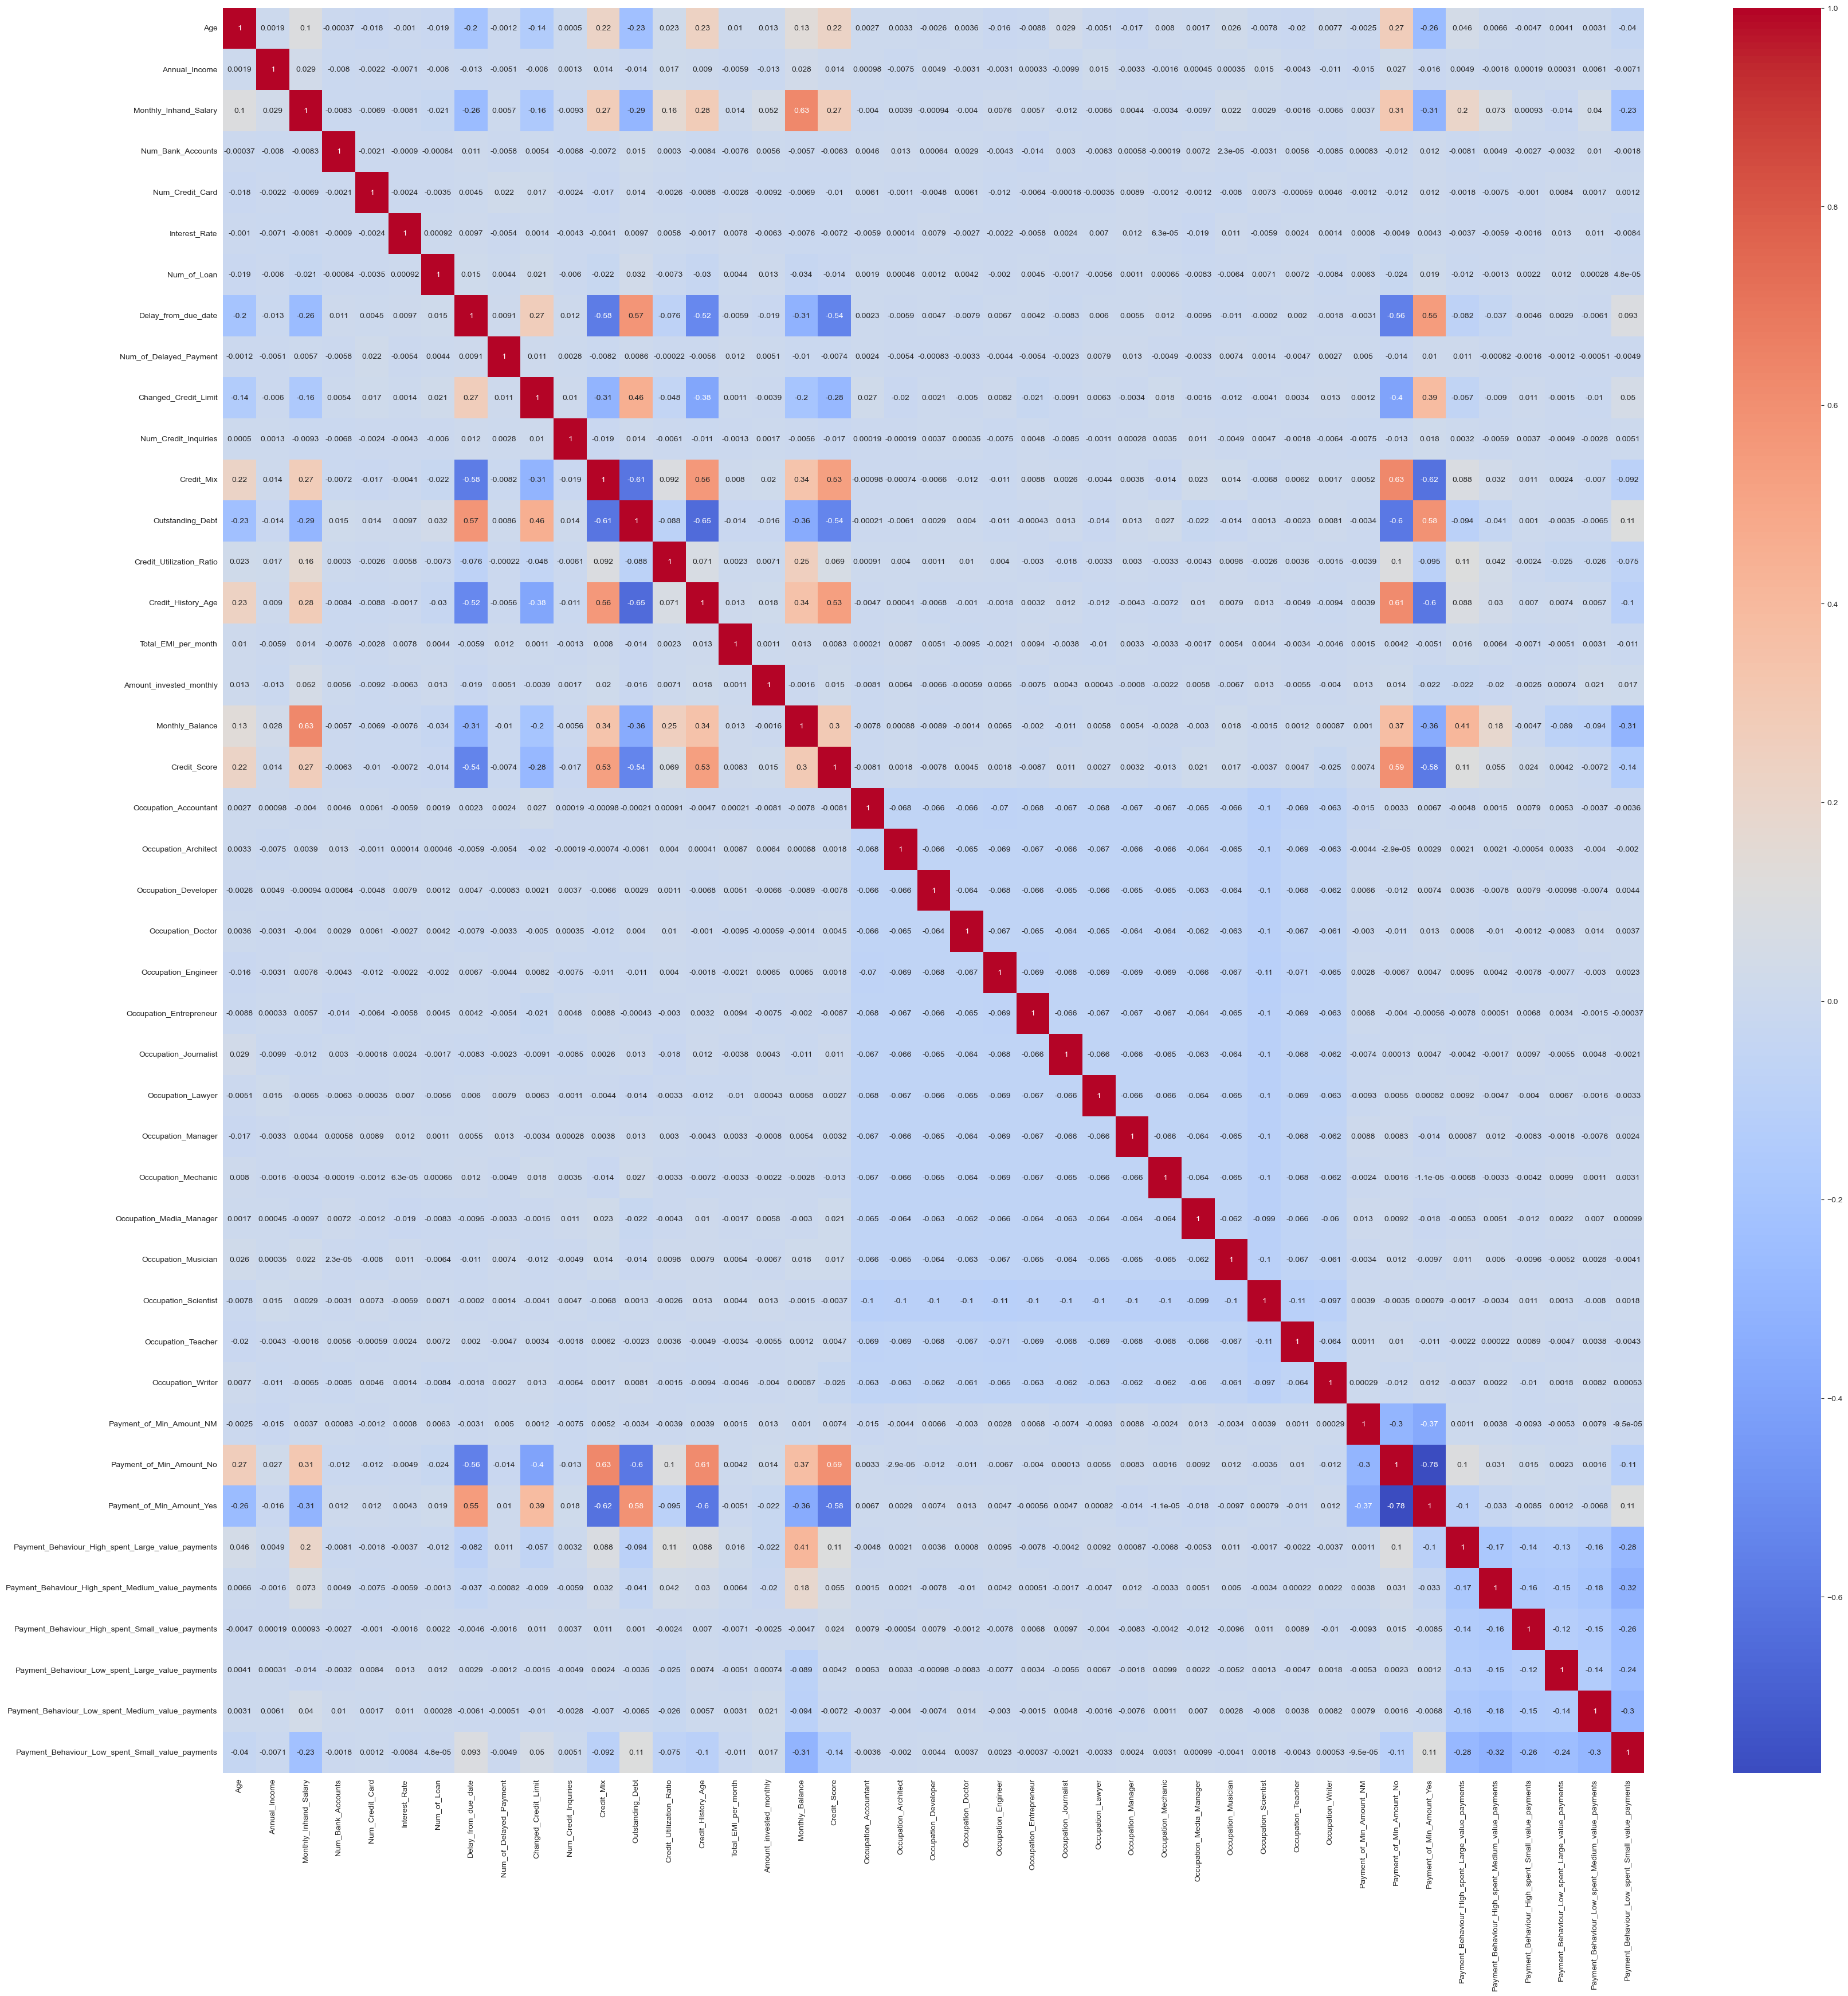

In [250]:
# 设置颜色风格为"whitegrid"
sns.set_style("whitegrid")

plt.figure(figsize=(40, 40))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [243]:
import pandas_profiling as ppf
profile = ppf.ProfileReport(df)
profile.to_file(output_file="output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [252]:
# 相关性很低的特征
# columns_to_drop = ["Num_Bank_Accounts", "Num_Credit_Card","Interest_rate", "Num_of_Loan", "Num_of_Delayed_Payment", "Num_credit_Inquires" ]
columns_to_drop = ["Annual_Income"]
df = df_dropped = df.drop(columns=columns_to_drop)